In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
from datetime import datetime
from datetime import date
from datetime import timedelta
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.formula.api as sm
import random

First, I will start off with exploratory data analysis. I want to get a feeling of the data and 
understand what is in the different columns in order to be able to make predictions later.
I will perform the various checks first and will summarize the results, when done.

In [4]:
df = pd.read_csv('./data/ted_main.csv')
df.head()

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views
0,4553,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,1140825600,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",Author/educator,"['children', 'creativity', 'culture', 'dance',...",Do schools kill creativity?,https://www.ted.com/talks/ken_robinson_says_sc...,47227110
1,265,With the same humor and humanity he exuded in ...,977,TED2006,1140825600,43,Al Gore,Al Gore: Averting the climate crisis,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i...","[{'id': 243, 'hero': 'https://pe.tedcdn.com/im...",Climate advocate,"['alternative energy', 'cars', 'climate change...",Averting the climate crisis,https://www.ted.com/talks/al_gore_on_averting_...,3200520
2,124,New York Times columnist David Pogue takes aim...,1286,TED2006,1140739200,26,David Pogue,David Pogue: Simplicity sells,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 964}, {'i...","[{'id': 1725, 'hero': 'https://pe.tedcdn.com/i...",Technology columnist,"['computers', 'entertainment', 'interface desi...",Simplicity sells,https://www.ted.com/talks/david_pogue_says_sim...,1636292
3,200,"In an emotionally charged talk, MacArthur-winn...",1116,TED2006,1140912000,35,Majora Carter,Majora Carter: Greening the ghetto,1,1151367060,"[{'id': 3, 'name': 'Courageous', 'count': 760}...","[{'id': 1041, 'hero': 'https://pe.tedcdn.com/i...",Activist for environmental justice,"['MacArthur grant', 'activism', 'business', 'c...",Greening the ghetto,https://www.ted.com/talks/majora_carter_s_tale...,1697550
4,593,You've never seen data presented like this. Wi...,1190,TED2006,1140566400,48,Hans Rosling,Hans Rosling: The best stats you've ever seen,1,1151440680,"[{'id': 9, 'name': 'Ingenious', 'count': 3202}...","[{'id': 2056, 'hero': 'https://pe.tedcdn.com/i...",Global health expert; data visionary,"['Africa', 'Asia', 'Google', 'demo', 'economic...",The best stats you've ever seen,https://www.ted.com/talks/hans_rosling_shows_t...,12005869


In [5]:
df['event'].value_counts().head(10)
# df['event'].value_counts().count()
# 355 different events

TED2014           84
TED2009           83
TED2013           77
TED2016           77
TED2015           75
TED2011           70
TEDGlobal 2012    70
TED2010           68
TEDGlobal 2011    68
TED2007           68
Name: event, dtype: int64

In [6]:
# Ted Global vs Regular Ted talks - Create dummy variable for global events, assuming they are more popular
df['is_global'] = df['event'].str.contains("TEDGlobal")

In [7]:
# ts = df['film_date'][0]
# datetime.utcfromtimestamp(ts).strftime('%Y-%m-%d')
# Transform date to human-readable format
df['film_date'] =  pd.to_datetime(df['film_date'],unit = 's')
df['film_date'].head()

0   2006-02-25
1   2006-02-25
2   2006-02-24
3   2006-02-26
4   2006-02-22
Name: film_date, dtype: datetime64[ns]

In [8]:
#Transform date to human-readable format
df['published_date'] =  pd.to_datetime(df['published_date'],unit = 's')
#Remove unnecessary time from datetime
# df['published_date'] = pd.to_datetime(df['published_date']).dt.date
# df['published_date'].head()

In [9]:
df['num_speaker'].value_counts()

1    2492
2      49
3       5
4       3
5       1
Name: num_speaker, dtype: int64

In [10]:
df['main_speaker'].value_counts().count()
# 2156 different speakers

2156

In [11]:
# Most appearances
df['main_speaker'].value_counts().head(10)

Hans Rosling            9
Juan Enriquez           7
Rives                   6
Marco Tempest           6
Nicholas Negroponte     5
Julian Treasure         5
Jacqueline Novogratz    5
Clay Shirky             5
Bill Gates              5
Dan Ariely              5
Name: main_speaker, dtype: int64

In [12]:
df['speaker_occupation'].value_counts().head(10)

Writer          45
Designer        34
Artist          34
Journalist      33
Entrepreneur    31
Architect       30
Inventor        27
Psychologist    26
Photographer    25
Filmmaker       21
Name: speaker_occupation, dtype: int64

In [17]:
# Aggregate all tags
tag_count = CountVectorizer()
tag_array = tag_count.fit_transform(df.tags).toarray()
#len(count.get_feature_names())
# 440 different tags. Probably that is too many. Let's see the top 10 most widely-used.

tag_array = tag_count.fit_transform(df.tags).toarray()
tags_distribution = pd.DataFrame(tag_array, columns = tag_count.get_feature_names())
sum = tags_distribution.sum(axis = 0, skipna = True)
top_10_tags = sum.sort_values(ascending=False)[0:10]
top_10_tags

technology    727
science       675
global        565
design        526
issues        501
health        489
culture       486
tedx          450
business      374
change        305
dtype: int64

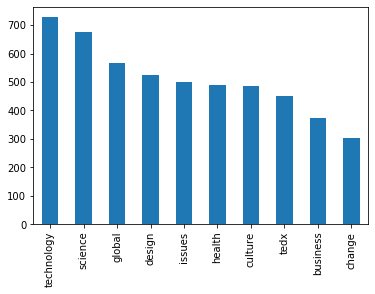

In [18]:
# The most used tag is technology, followed by science and global.
top_10_tags.plot.bar()

In [19]:
# I would drop the name and url columns. The name is a combination of speaker and title, and regarding the url, 
# I don't believe it will be useful for the purpose of this analysis
df = df.drop(['name','url'], axis = 1)
df.shape

(2550, 16)

In [89]:
# duration, event = global/no, date, languages, nr of speakers, ratings - positive/negative

In [90]:
# Let's check the difference between the date columns
df['time_diff'] = df['published_date'] - df['film_date']

# On average it takes 249 days for a clip to be uploaded on the TED website after a talk is being performed.
df['time_diff'].mean()

# The first talk was held in 1972, so if we remove this outlier, it will take a lot less on average to be uploaded
# on the website.
df['film_date'].min()

#Let's filter the data based on the date of the first uploaded video - 2006-06-27
df['published_date'].min()

mask = df['film_date'] > "2006-06-27"
# We filtered 221 rows, which represent the talks made before 27th of June 2006.
temp_df = df[mask]
temp_df['time_diff_2'] = temp_df['published_date'] - temp_df['film_date']

#After the introduction of the website, it takes 127 days on average to upload a video.
temp_df['time_diff_2'].mean()



C:\Users\makar\Anaconda3_NEW\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


Timedelta('127 days 19:05:38.817947')

In [91]:
# I will first transform the data for dates, which will be more useful when building our model later. 
# The transformation will be the following: I will subtract the given data from todays date 
# and will receive values in days. I chose to use published date, because i think 
# it is more relevant when predicting views to check the upload date of the video, instead of date of performance.

df['days_passed'] = pd.Timestamp.today() - df['published_date']
df['days_passed'] = df['days_passed'].dt.days
df['days_passed'].head()

0    4828
1    4828
2    4828
3    4828
4    4827
Name: days_passed, dtype: int64

In [92]:
df['duration'].max()

5256

In [93]:
df['duration'].min()

135

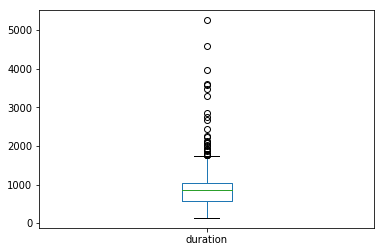

In [94]:
# By judging on this plot, we can see that most of the videos  are lasting below 2000 seconds (actually below 1800s.)
# The median is around 900 and the IQR is between 1000 and 500 (50% of the the talks last between 500-1000s.)
# There are very few talks, which lasted over 3000 seconds
df['duration'].plot.box()

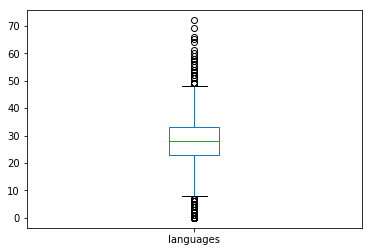

In [95]:
# Most translated talk - 72 languages
df['languages'].max()

# There exists a talk, which has 0 languages mentioned, this is not possible
df['languages'].min()

# On average TED talks are translated on 27 languages.
df['languages'].mean()

df['languages'].plot.box()
# 75% of the talks are translated to between 10 and ~48 languages.

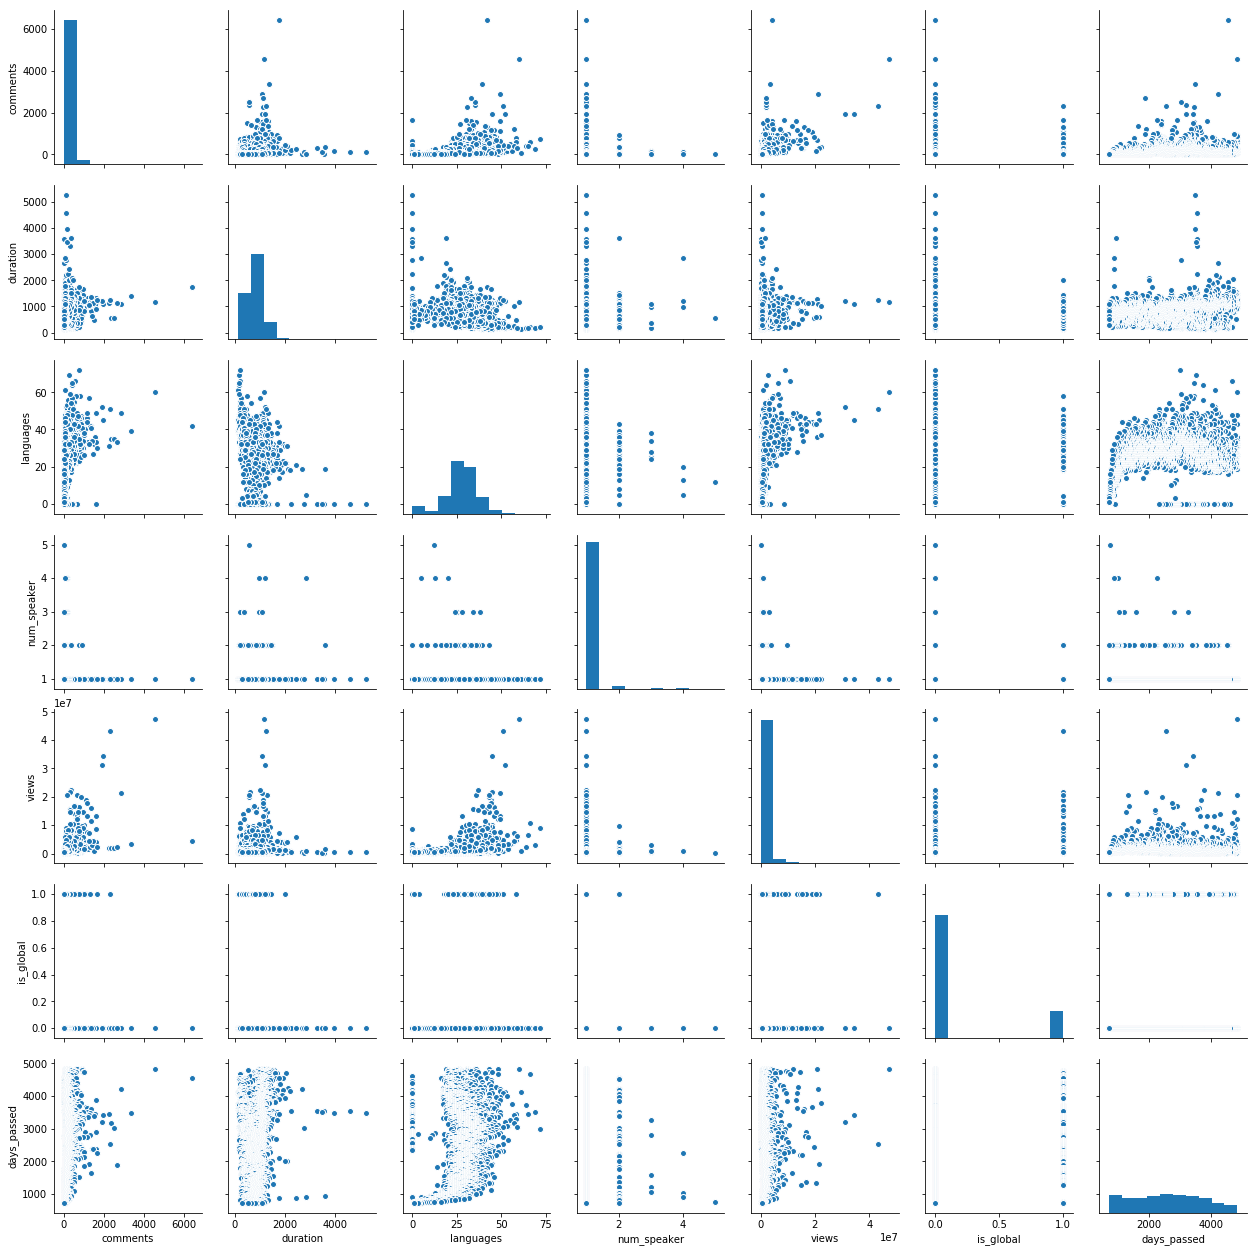

In [96]:
sns.pairplot(df)

Let's look at the plot now. The predicted value of our model will be views, so I will focus on explaining only the relations between the different variables and views. I will provide information regarding the plots above the diagonal (upper right part of the mixed plot.)

Comments - usually, we can assume that as views grow, the comments will grow as well, and we have such a situation here. However, there is one outlier - actually the video with the largest amount of comments doesn't have that many views. It can be seen at the top left of the respective plot. Furthermore, we can observe a heavy-tailed distribution of the comments, suggesting that there are few videos with large number of comments, but most of the videos have few.

Duration - we already commented the distribution of the durations. Regarding the relation with views= we can see what appears to be a negative correlation - the longer the video, the fewer views it gets. This is also expected, as the average internet user tends to focus more on shorter videos.

Languages - As expected, we can observe a positive correlation between views and languages. The more languages a video has, the higher amount of people it reaches.

The number of speakers appears to be somewhat irrelevant. There are just too many categories (1-5 speakers) with not enough data for each of them. I will transform the variable into a 2-categorical: single speaker/multi-speaker

Views - again heavy-tailed distribution, as was the case with comments. Few of the videos have large amounts of views.

Days passed - it is expected to see a positive correlation between views and days passed. We can assume, that the longer a video is online, the more views it will aggregate. However, excluding an early outlier, the data doesn't suggest such a relationship. There is no obvious trend.

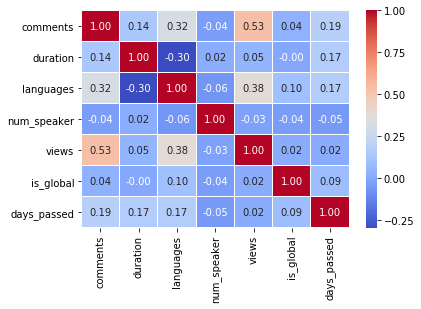

In [97]:
corr = df.corr()
hm = sns.heatmap(corr,
                 cmap="coolwarm",
                 annot=True, 
                 fmt='.2f',
                 linewidths=.05)

As we can see on the correlation matrix plot above, it serves to prove the positive language correlation with views. Furthermore, the comments are strongly correlated with views as well. One thing, that was missed before is the negative correlation between duration and languages. It may prove to be a problem, because of multicollinearity for our model. Nevertheless, I think it should be fine if we leave them both in.
No observable difference can be made between global and non-global events.

In [98]:
# The related videos column can be used to create a graph and explore the relationships between the talks.

In [99]:
df['ratings'][0]
# Dict with all ratings, that the talk received. Obviously ratings are categorical here, instead of on a scale and 
# you can select among multiple options when rating.

"[{'id': 7, 'name': 'Funny', 'count': 19645}, {'id': 1, 'name': 'Beautiful', 'count': 4573}, {'id': 9, 'name': 'Ingenious', 'count': 6073}, {'id': 3, 'name': 'Courageous', 'count': 3253}, {'id': 11, 'name': 'Longwinded', 'count': 387}, {'id': 2, 'name': 'Confusing', 'count': 242}, {'id': 8, 'name': 'Informative', 'count': 7346}, {'id': 22, 'name': 'Fascinating', 'count': 10581}, {'id': 21, 'name': 'Unconvincing', 'count': 300}, {'id': 24, 'name': 'Persuasive', 'count': 10704}, {'id': 23, 'name': 'Jaw-dropping', 'count': 4439}, {'id': 25, 'name': 'OK', 'count': 1174}, {'id': 26, 'name': 'Obnoxious', 'count': 209}, {'id': 10, 'name': 'Inspiring', 'count': 24924}]"

In [100]:
# Create positive and negative categories to be used in the model
# The logic is to select the top 3 tags(tried with 5 as well, but then we wont have enough negatives), then 
# if more of the ratings are positive - we classify it as positive and the opposite.
df['ratings']=df['ratings'].str.replace("'",'"')
positive = ['Funny', 'Beautiful', 'Ingenious',
             'Courageous', 'Informative', 'Fascinating', 'Persuasive', 'Jaw-dropping', 'Inspiring']
negative = ['Longwinded','Confusing','Unconvincing','Obnoxious']
negative_count = 0
positive_count = 0
for idx,row in enumerate(df['ratings']):
    current_ratings = pd.read_json(row)
    
    temp_df = current_ratings.nlargest(3,'count')
    checksum = 0
    for row in temp_df['name']:
        if row in positive:
            checksum += 1
        if row in negative:
            checksum -= 1
    if checksum > 0:
        positive_count +=1
#         print("Positive")
        df.loc[idx,'is_positive'] = 1
    else:
        df.loc[idx,'is_positive'] = 0
        negative_count +=1
#         print("Negative")
    
    
print("Positives %s " %positive_count)
print("Negatives %s " %negative_count)

Positives 2487 
Negatives 63 


In [101]:
# Create a categorical variable, if a single speaker or not.
df['single_speaker'] = np.where(df['num_speaker'] == 1, 1, 0)

In [102]:
df.head()

,comments,description,duration,event,film_date,languages,main_speaker,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,views,is_global,time_diff,days_passed,is_positive,single_speaker
0,4553,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,2006-02-25,60,Ken Robinson,1,2006-06-27 00:11:00,"[{""id"": 7, ""name"": ""Funny"", ""count"": 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",Author/educator,"['children', 'creativity', 'culture', 'dance',...",Do schools kill creativity?,47227110,False,122 days 00:11:00,4828,1.0,1
1,265,With the same humor and humanity he exuded in ...,977,TED2006,2006-02-25,43,Al Gore,1,2006-06-27 00:11:00,"[{""id"": 7, ""name"": ""Funny"", ""count"": 544}, {""i...","[{'id': 243, 'hero': 'https://pe.tedcdn.com/im...",Climate advocate,"['alternative energy', 'cars', 'climate change...",Averting the climate crisis,3200520,False,122 days 00:11:00,4828,1.0,1
2,124,New York Times columnist David Pogue takes aim...,1286,TED2006,2006-02-24,26,David Pogue,1,2006-06-27 00:11:00,"[{""id"": 7, ""name"": ""Funny"", ""count"": 964}, {""i...","[{'id': 1725, 'hero': 'https://pe.tedcdn.com/i...",Technology columnist,"['computers', 'entertainment', 'interface desi...",Simplicity sells,1636292,False,123 days 00:11:00,4828,1.0,1
3,200,"In an emotionally charged talk, MacArthur-winn...",1116,TED2006,2006-02-26,35,Majora Carter,1,2006-06-27 00:11:00,"[{""id"": 3, ""name"": ""Courageous"", ""count"": 760}...","[{'id': 1041, 'hero': 'https://pe.tedcdn.com/i...",Activist for environmental justice,"['MacArthur grant', 'activism', 'business', 'c...",Greening the ghetto,1697550,False,121 days 00:11:00,4828,1.0,1
4,593,You've never seen data presented like this. Wi...,1190,TED2006,2006-02-22,48,Hans Rosling,1,2006-06-27 20:38:00,"[{""id"": 9, ""name"": ""Ingenious"", ""count"": 3202}...","[{'id': 2056, 'hero': 'https://pe.tedcdn.com/i...",Global health expert; data visionary,"['Africa', 'Asia', 'Google', 'demo', 'economic...",The best stats you've ever seen,12005869,False,125 days 20:38:00,4827,1.0,1


Now after we have transformed some of the columns, we can start building our models.

In [72]:
# Select the variables, which will be used in the model.
random.seed( 30 )
X = df[['duration','languages','is_global','days_passed','is_positive','single_speaker','comments']]
y = df['views']

# Let's create train and test sets. The test data will be 1/4 of the entire dataset.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,random_state=30)

In [73]:
# Linear Regression model
lm = LinearRegression()
model = lm.fit(X_train,y_train)
coeff_df = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])  
coeff_df

,Coefficient
duration,657.434169
languages,75219.515426
is_global,-112625.688601
days_passed,-258.508842
is_positive,447814.782372
single_speaker,206485.563414
comments,4032.151470


The coefficient table above shows the different parameter coefficients. If we increase the duration by 1 second, the model predicts 657 more views. 

If we add a translation for one adittional language to a talk, we can expect 75 219 more views.

If the event was Ted Global event, we can expect 112 625 less views.

The more days pass, contrary to my earlier suggestion, we can see that the model predicts that the views will be less. This is actually not phisically possible, but the model has found such a relationship.

If the talk is positive, it will be expected to have close to 447 814 views more, than a negative one.

Furthermore, if it is held by a single speaker,the model predicts to have 206 485 views more than if presented by > than 1.

And finally, the comments point, that if we increase them by 1, we are expected to have 4032 more views.

In [75]:
y_pred = model.predict(X_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df.head(30)

,Actual,Predicted
2080,1879260,1.738790e+06
2383,1240167,7.726123e+05
1808,554809,1.087526e+06
893,2391977,3.134702e+06
1957,4160772,2.613906e+06
1561,1423637,2.585427e+06
95,616385,2.654140e+06
1082,1482664,2.677248e+06
2495,1346060,1.829673e+05
507,811565,1.064896e+06


We can see, that there is untolerable difference between expected and predicted values. The model seems too much off the target. Let's check the model's score.

In [74]:
model.score(X_test,y_test)

0.3547966152865969

The R2 is ~0.355, which means, that roughly 35.5% of the variance of the data is explained by the model. The value is too low and has proved our previous assumption, that the model can't represent the relationship between the predictor variables and talks' views. We should accept the null hypothesis, which means, that no significant relationship can be observed between views and the other variables.

In [134]:
# Split Data again to be used in a different model, accepting data structured in a different way.
train = df.sample(frac=0.75,random_state=200)
test = df.drop(train.index)

In [135]:
result = sm.ols(formula= "views ~ duration + languages + is_global + days_passed + is_positive + single_speaker + comments", data=train).fit()

In [136]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                  views   R-squared:                       0.352
Model:                            OLS   Adj. R-squared:                  0.349
Method:                 Least Squares   F-statistic:                     147.6
Date:                Sun, 15 Sep 2019   Prob (F-statistic):          3.83e-174
Time:                        11:03:25   Log-Likelihood:                -30520.
No. Observations:                1912   AIC:                         6.106e+04
Df Residuals:                    1904   BIC:                         6.110e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept         -1.134e+06    4.8e+0

This is the preferred output for me. Here we can see the importance of the different parameters and have all the data on a single place. Roughly speaking, the R-Squared is close to the one, which we achieved using the different model. However, here we can see, that the single_speaker variable is not significant (high p-value) and we can exclude it from the model.

In [137]:
result = sm.ols(formula= "views ~ duration + languages + is_global + days_passed + is_positive + comments", data=train).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                  views   R-squared:                       0.352
Model:                            OLS   Adj. R-squared:                  0.350
Method:                 Least Squares   F-statistic:                     172.3
Date:                Sun, 15 Sep 2019   Prob (F-statistic):          2.83e-175
Time:                        11:03:29   Log-Likelihood:                -30520.
No. Observations:                1912   AIC:                         6.105e+04
Df Residuals:                    1905   BIC:                         6.109e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept         -1.181e+06   3.88e+0

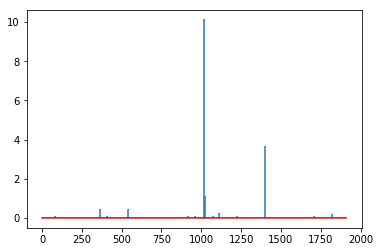

In [152]:
# Check for outliers by using Cook's distance, cutoff at 0.005. I've tried with different values, 
# but if we reduce too much, we will overfit the model
infl = result.get_influence()
infl.cooks_distance
distance, p_val = infl.cooks_distance
train['cooks'] = distance
plt.stem(np.arange(len(distance)), distance, markerfmt=",")
plt.show()
train_new = train[train['cooks'] <= 0.001]

In [171]:
# Add the variables again and check the p-values without the outliers. 
# Only the single_speaker variable remained insignificant
result2 = sm.ols(formula= 
                 "views ~ duration + languages + is_global + days_passed + \
                 is_positive + comments", data=train_new).fit()
print(result2.summary2())

                          Results: Ordinary least squares
Model:                    OLS                   Adj. R-squared:          0.462     
Dependent Variable:       views                 AIC:                     53915.7026
Date:                     2019-09-15 11:23      BIC:                     53954.1947
No. Observations:         1806                  Log-Likelihood:          -26951.   
Df Model:                 6                     F-statistic:             259.0     
Df Residuals:             1799                  Prob (F-statistic):      5.10e-239 
R-squared:                0.463                 Scale:                   5.3842e+11
-----------------------------------------------------------------------------------
                     Coef.       Std.Err.     t     P>|t|     [0.025       0.975]  
-----------------------------------------------------------------------------------
Intercept         -115091.9428 152602.1553  -0.7542 0.4508 -414388.0349 184204.1492
is_global[T.True] 

In [172]:
# Let's play with the predictors a little bit and see if we can get an improvement. 
# Previously, we saw, that there might be a synergy between the duration and languages
result3 = sm.ols(formula= 
                 "views ~ duration + languages + is_global + days_passed + \
                 is_positive + comments + duration:languages", data=train_new).fit()
print(result3.summary2())
# No significant improvement on the Adj. R2

                          Results: Ordinary least squares
Model:                     OLS                   Adj. R-squared:          0.464     
Dependent Variable:        views                 AIC:                     53910.0387
Date:                      2019-09-15 11:23      BIC:                     53954.0296
No. Observations:          1806                  Log-Likelihood:          -26947.   
Df Model:                  7                     F-statistic:             223.9     
Df Residuals:              1798                  Prob (F-statistic):      1.91e-239 
R-squared:                 0.466                 Scale:                   5.3644e+11
------------------------------------------------------------------------------------
                      Coef.       Std.Err.     t     P>|t|     [0.025       0.975]  
------------------------------------------------------------------------------------
Intercept            65807.5993 165775.6794   0.3970 0.6914 -259325.6302 390940.8288
is_glob

In [173]:
# By adding the squared days passed, we receive better results and it is with great p-value of 0. This suggests, that 
# the relationship between the days passed and the views is non-linear
result4 = sm.ols(formula= 
                 "views ~ duration + languages + is_global + days_passed + \
                 is_positive + comments + I(days_passed**2)", data=train_new).fit()
print(result4.summary2())

                           Results: Ordinary least squares
Model:                    OLS                    Adj. R-squared:           0.492     
Dependent Variable:       views                  AIC:                      53812.4063
Date:                     2019-09-15 11:23       BIC:                      53856.3973
No. Observations:         1806                   Log-Likelihood:           -26898.   
Df Model:                 7                      F-statistic:              250.6     
Df Residuals:             1798                   Prob (F-statistic):       1.73e-260 
R-squared:                0.494                  Scale:                    5.0821e+11
-------------------------------------------------------------------------------------
                       Coef.      Std.Err.     t     P>|t|     [0.025       0.975]   
-------------------------------------------------------------------------------------
Intercept           716809.8610 168498.9273   4.2541 0.0000  386335.5684 1047284.

In [176]:
# Another great improvement we get is when we introduce the synergy of comments and languages in the model.
# We already have an adjusted R2 of 52%, which improved on our first model with 17%
result5 = sm.ols(formula= 
                 "views ~ duration + languages + is_global + days_passed + \
                 is_positive + comments + I(days_passed**2) + comments:languages", 
                 data=train_new).fit()
print(result5.summary2())

                           Results: Ordinary least squares
Model:                     OLS                    Adj. R-squared:           0.520     
Dependent Variable:        views                  AIC:                      53711.1587
Date:                      2019-09-15 11:23       BIC:                      53760.6485
No. Observations:          1806                   Log-Likelihood:           -26847.   
Df Model:                  8                      F-statistic:              245.3     
Df Residuals:              1797                   Prob (F-statistic):       1.65e-281 
R-squared:                 0.522                  Scale:                    4.8024e+11
--------------------------------------------------------------------------------------
                       Coef.       Std.Err.     t     P>|t|     [0.025       0.975]   
--------------------------------------------------------------------------------------
Intercept           1002527.6498 166136.4623   6.0344 0.0000  676686.70

I won't introduce anymore variables, as we might overfit the model too much. Instead I will make interpretation of the results, afterwards I will predict the test data to see how the model will perform and will include a plot of the expected vs actual values.

The intercept is at 1 002 527, which means, that if other things remain 0, the model predicts for a talk to start with 1 million views.

If the event is global, we expect 53 700 fewer views,

If the duration is increased by 1 sec, we can expect 357 more views

If a language is added - almost 30 000 views more,

If it is positive - 170 000 more views

For each comment, the views are expected to decrease by 437, which is interesting, but can be explained with the large intercept and the need for it to be decreased

After I've tried building all these models, I would conclude, that the views of a TED talk can be predicted using these predictors. Furthermore, we've gained useful insights which can be used in feature engineering in the future.

There are few variables, which were left without being used in the model. For example, we can create a bag of words from the descriptions and create some king of sentiment analysis, we can crete clusters of interconnected talks, based on the related_talks variable and etc.